In [50]:
import torch
import pykeen
import pandas as pd
from pykeen import predict
from pykeen.pipeline import pipeline
from pykeen.hpo import hpo_pipeline
from pykeen.triples import TriplesFactory
import numpy as np
from pykeen.utils import set_random_seed
from matplotlib import pyplot as plt


file_path = 'C.1_query.tsv'
tf = TriplesFactory.from_path(file_path, delimiter="\t")
training, testing = tf.split([0.85, 0.15], random_state=2025)
training, validation = training.split([0.8, 0.2], random_state=2025)
device = "cuda" if torch.cuda.is_available() else "cpu"

pd.set_option('display.max_columns', None)


def graph_display(x, y, title):
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(x, y, '-o')
    plt.xlabel('Trial Number')
    plt.ylabel('Objective Metric Value')
    plt.title(title)
    plt.grid(True)  # Optional: add grid for readability
    plt.xticks(x)
    plt.show()


In [28]:
transHResults = pd.read_csv('transh_hpo_result/trials.tsv', sep='\t')
rotatEResults = pd.read_csv('rotate_hpo_result/trials.tsv', sep='\t')
complExResults = pd.read_csv('complex_hpo_result/trials.tsv', sep='\t')
convKBResults = pd.read_csv('convkb_hpo_result/trials.tsv', sep='\t')

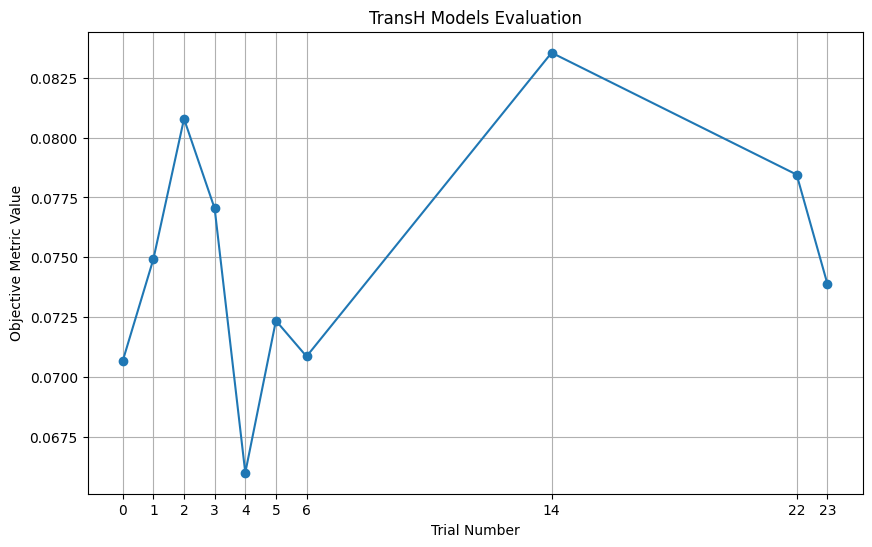

In [51]:
transHResults = transHResults[['number', 'value', 'params_loss.margin', 'params_model.embedding_dim', 'params_model.scoring_fct_norm',
                'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr', 'params_optimizer.weight_decay', 
                'params_regularizer.weight', 'params_training.batch_size', 'params_training.num_epochs', 'state']]
transHResults = transHResults[transHResults.state=='COMPLETE']
transHResults
graph_display(transHResults.number, transHResults.value, 'TransH Models Evaluation')

In [59]:
transHResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
transHResults.sort_values('value', ascending=False)

,number,value,loss.margin,model.embedding_dim,model.scoring_fct_norm,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,regularizer.weight,training.batch_size,training.num_epochs,state
14,14,0.083539,2.103085,192,1,4,0.000521,0.000643,0.590670,64,100,COMPLETE
2,2,0.080781,0.792548,128,1,7,0.000182,0.000703,0.114549,128,150,COMPLETE
22,22,0.078450,2.487713,128,1,4,0.000687,0.000732,0.385151,32,50,COMPLETE
3,3,0.077038,2.334676,128,1,4,0.000864,0.000733,0.251666,256,50,COMPLETE
1,1,0.074926,1.743727,192,2,7,0.000306,0.000207,0.969707,512,50,COMPLETE
23,23,0.073905,2.645279,128,1,1,0.000552,0.000449,0.012711,32,50,COMPLETE
5,5,0.072355,1.064236,256,2,4,0.000199,0.000986,0.142642,16,150,COMPLETE
6,6,0.070862,0.177556,256,2,10,0.000776,0.000794,0.518699,256,50,COMPLETE
0,0,0.070678,1.483400,128,2,7,0.000392,0.000948,0.192811,2048,150,COMPLETE
4,4,0.066008,1.038993,128,1,10,0.000187,0.000267,0.198213,2048,100,COMPLETE


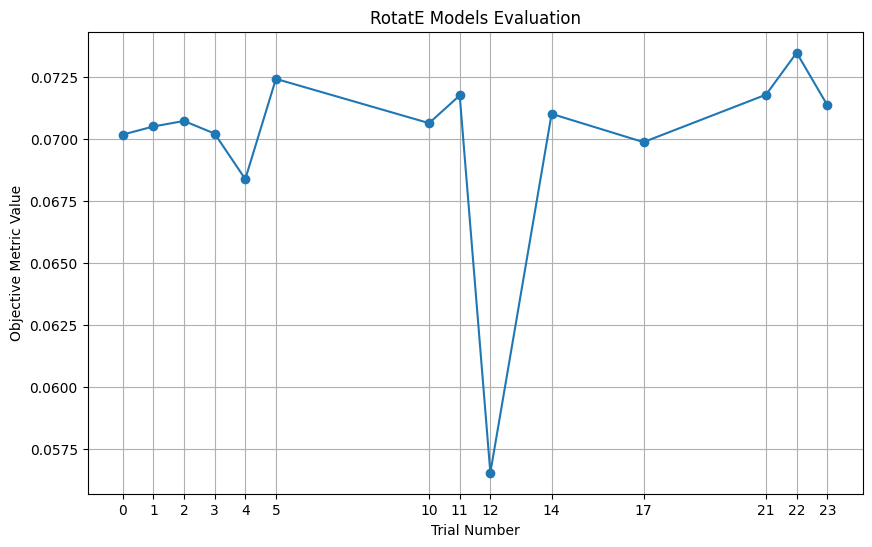

In [52]:
rotatEResults = rotatEResults[['number', 'value', 'params_loss.margin', 'params_model.embedding_dim', 
                               'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr', 'params_optimizer.weight_decay', 
                               'params_training.batch_size', 'params_training.num_epochs', 'state']]
rotatEResults = rotatEResults[rotatEResults.state=='COMPLETE']
graph_display(rotatEResults.number, rotatEResults.value, 'RotatE Models Evaluation')

In [60]:
rotatEResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
rotatEResults.sort_values('value', ascending=False)

,number,value,loss.margin,model.embedding_dim,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,training.batch_size,training.num_epochs,state
22,22,0.073469,2.213980,256,7,0.000401,0.000101,256,100,COMPLETE
5,5,0.072416,1.123448,256,7,0.000983,0.000143,32,150,COMPLETE
21,21,0.071780,1.844456,256,7,0.000450,0.000101,256,100,COMPLETE
11,11,0.071748,0.432955,256,7,0.000106,0.000175,16,50,COMPLETE
23,23,0.071358,2.234167,256,7,0.000367,0.000111,256,100,COMPLETE
14,14,0.071006,1.870472,256,7,0.000448,0.000103,256,100,COMPLETE
2,2,0.070720,0.801299,192,4,0.000124,0.000273,16,50,COMPLETE
10,10,0.070632,1.971252,128,10,0.000412,0.000109,32,150,COMPLETE
1,1,0.070498,2.823840,192,1,0.000197,0.000221,128,100,COMPLETE
3,3,0.070211,1.442740,192,1,0.000195,0.000275,512,150,COMPLETE


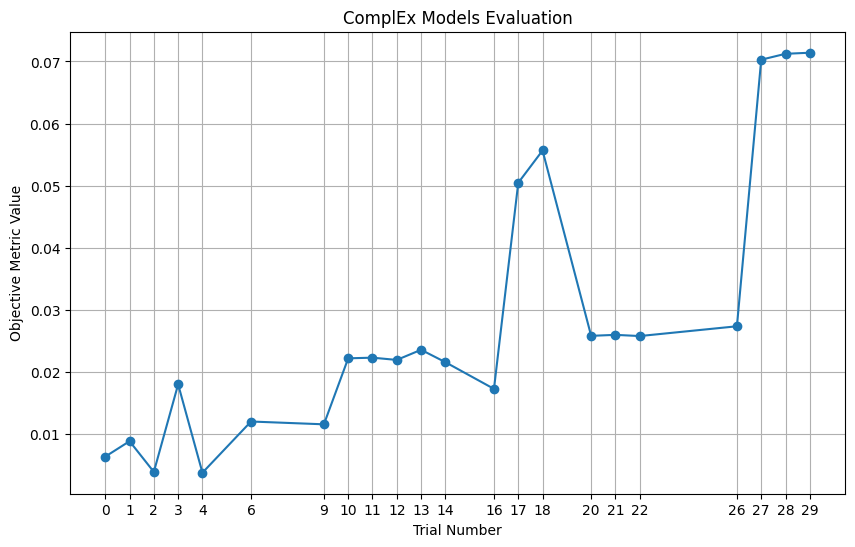

In [53]:
complExResults = complExResults[['number', 'value', 'params_model.embedding_dim', 
                               'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr', 'params_optimizer.weight_decay', 
                               'params_training.batch_size', 'params_training.num_epochs', 'state']]
complExResults = complExResults[complExResults.state=='COMPLETE']
graph_display(complExResults.number, complExResults.value, 'ComplEx Models Evaluation')

In [61]:
complExResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
complExResults.sort_values('value', ascending=False)

,number,value,model.embedding_dim,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,training.batch_size,training.num_epochs,state
29,29,0.071403,192,1,0.000464,0.000206,16,150,COMPLETE
28,28,0.071229,192,1,0.000470,0.000249,16,100,COMPLETE
27,27,0.070279,192,1,0.000449,0.000789,16,50,COMPLETE
18,18,0.055671,192,1,0.000203,0.000661,16,50,COMPLETE
17,17,0.050475,192,1,0.000198,0.000676,16,50,COMPLETE
26,26,0.027389,128,1,0.000237,0.000799,32,50,COMPLETE
21,21,0.026009,128,4,0.000214,0.000603,32,50,COMPLETE
20,20,0.025850,128,4,0.000208,0.000615,32,50,COMPLETE
22,22,0.025816,128,1,0.000249,0.000570,32,50,COMPLETE
13,13,0.023605,192,1,0.000102,0.000717,16,50,COMPLETE


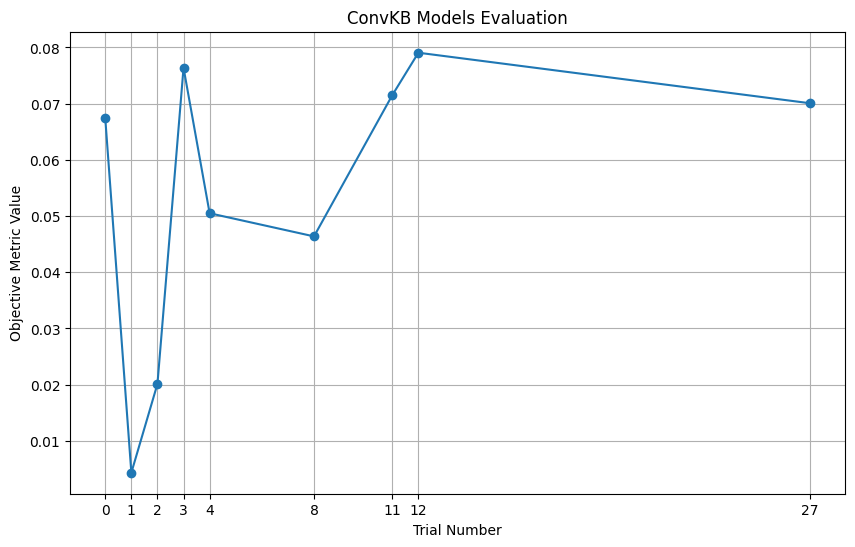

In [54]:
convKBResults = convKBResults[['number', 'value', 'params_loss.margin', 'params_model.embedding_dim', 'params_model.hidden_dropout_rate',
                               'params_model.num_filters', 'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr',
                               'params_optimizer.weight_decay', 'params_regularizer.weight', 'params_training.batch_size', 
                               'params_training.num_epochs', 'state']]
convKBResults = convKBResults[convKBResults.state=='COMPLETE']
graph_display(convKBResults.number, convKBResults.value, 'ConvKB Models Evaluation')

In [62]:
convKBResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
convKBResults.sort_values('value', ascending=False)

,number,value,loss.margin,model.embedding_dim,model.hidden_dropout_rate,model.num_filters,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,regularizer.weight,training.batch_size,training.num_epochs,state
12,12,0.079053,1.770832,128,0.4,96,7,0.000950,0.000893,0.027373,128,100,COMPLETE
3,3,0.076374,1.652792,128,0.5,96,10,0.000724,0.000492,0.220543,32,150,COMPLETE
11,11,0.071502,0.268769,128,0.4,96,7,0.000678,0.000953,0.027553,128,50,COMPLETE
27,27,0.070071,1.778105,192,0.4,128,7,0.000700,0.000270,0.087925,128,50,COMPLETE
0,0,0.067401,0.232726,128,0.4,64,7,0.000197,0.000746,0.023143,128,50,COMPLETE
4,4,0.050497,2.129155,256,0.4,128,1,0.000172,0.000336,0.474445,32,150,COMPLETE
8,8,0.046381,0.876056,256,0.3,128,10,0.000413,0.000153,0.901744,16,150,COMPLETE
2,2,0.020134,2.012122,128,0.3,96,7,0.000250,0.000695,0.137772,512,100,COMPLETE
1,1,0.004342,1.194065,128,0.5,128,10,0.000627,0.000144,0.982448,4096,50,COMPLETE
